In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
# Carregar arquivo para um DataFrame
df_advertising = pd.read_csv('./Advertising.csv')
df_advertising

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [40]:
# EDA
# Visualizar o formato de dados com dtypes
df_advertising.dtypes

ID             int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [26]:
# Verificar estatisticas básicas 
df_advertising.describe()

,ID,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [27]:
# Identificando números ausentes
df_advertising.isnull().sum()

ID           0
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [39]:
# Dividir os dados em variáveis independentes (X) e dependente (y)
X = df_advertising[['TV', 'Radio', 'Newspaper']]  # As variáveis de entrada
y = df_advertising['Sales']  # A variável de saída

In [63]:
# Dividir conjunto entre treino e teste
X = df_advertising[['TV']]
y = df_advertising['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42)

In [64]:
# Treinar o algoritmo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
# Gerar Predições do conjunto de testes
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [66]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 10.174468290309424
R^2 Score: 0.6213181732230723


In [67]:
# Exibir os coeficientes do modelo
print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_}")


Intercepto: 6.803137769134525
Coeficiente: [0.04823382]


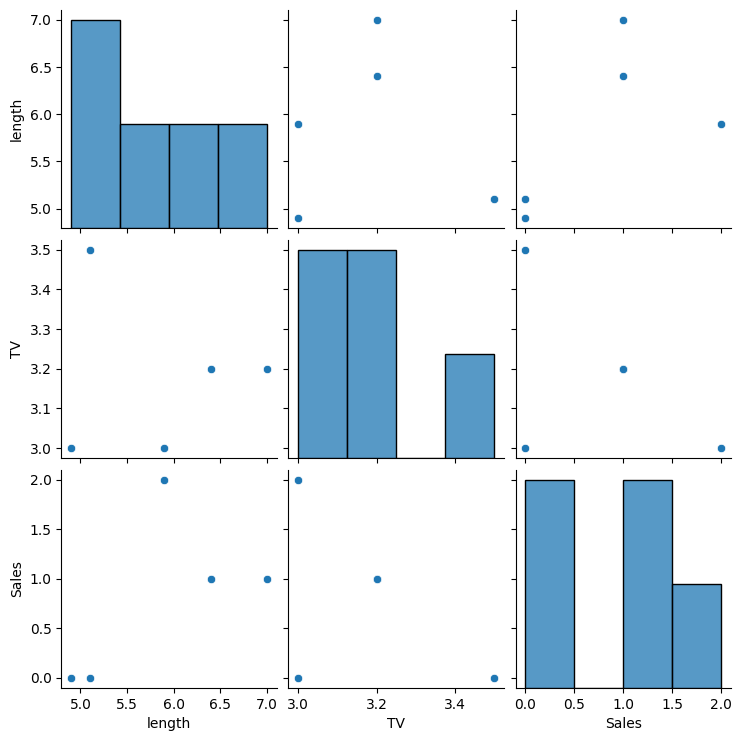

In [68]:
# Plotar gráficos de dispersão para visualização
sns.pairplot(df)
plt.show()

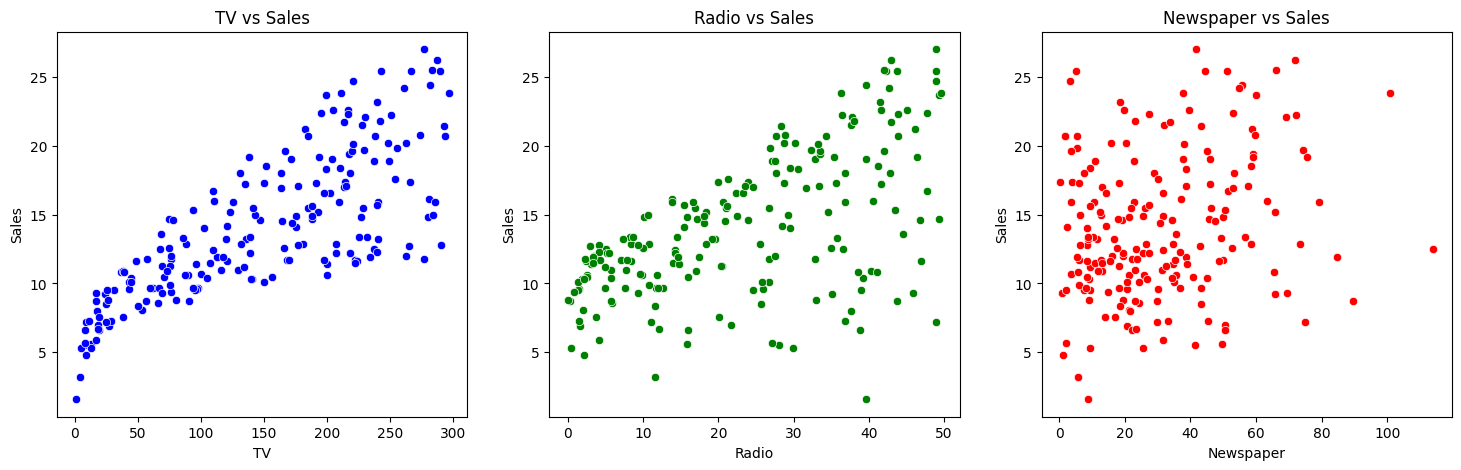

In [72]:
# Visualizar a relação entre cada variável e as vendas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df_advertising, x='TV', y='Sales', ax=axs[0], color='blue')
axs[0].set_title('TV vs Sales')
sns.scatterplot(data=df_advertising, x='Radio', y='Sales', ax=axs[1], color='green')
axs[1].set_title('Radio vs Sales')
sns.scatterplot(data=df_advertising, x='Newspaper', y='Sales', ax=axs[2], color='red')
axs[2].set_title('Newspaper vs Sales')
plt.show()


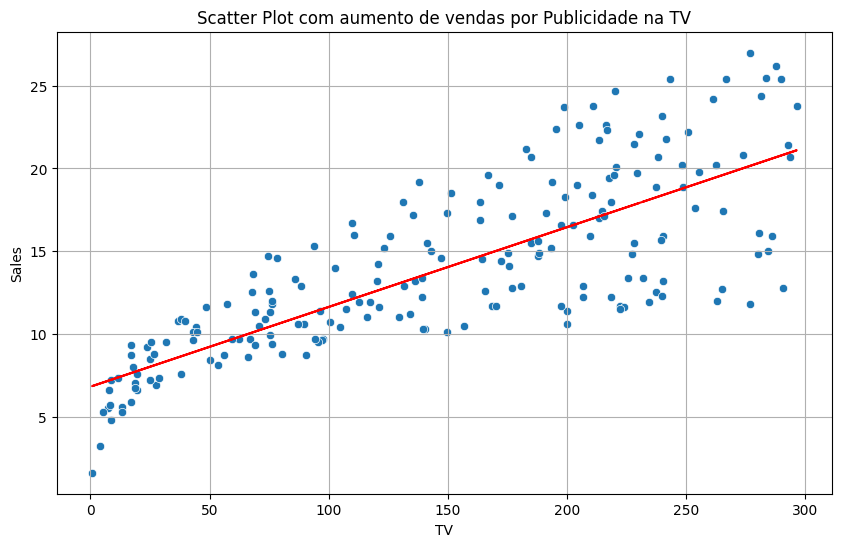

In [74]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_advertising['TV'], y=df_advertising['Sales'])
plt.plot(df_advertising['TV'], model.predict(df_advertising[['TV']]), color='red')
plt.title('Scatter Plot com aumento de vendas por Publicidade na TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid(True)
plt.show()
